# 

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_normal

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 
# 
X_train = X_train/255
X_test = X_test/255
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20




import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    



#Case 1: Two hidden layers with sizes 400 and 200

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2344 - acc: 0.9312 - val_loss: 0.1196 - val_acc: 0.9626
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0870 - acc: 0.9735 - val_loss: 0.0758 - val_acc: 0.9766
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0559 - acc: 0.9829 - val_loss: 0.0639 - val_acc: 0.9803
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0380 - acc: 0.9876 - val_loss: 0.0664 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0285 - acc: 0.9913 - val_loss: 0.0703 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0730 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0753 - val_ac

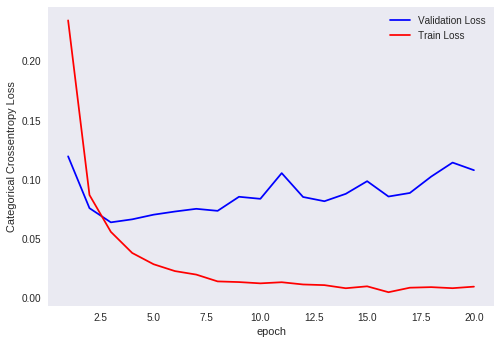

In [0]:
 from keras.models import Sequential 
from keras.layers import Dense, Activation 
  
model_relu = Sequential()
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(200, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))




vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Accuracy of case 1: 98.11**

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0087 - acc: 0.9987 - val_loss: 0.1728 - val_acc: 0.9821
Epoch 2/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0078 - acc: 0.9987 - val_loss: 0.1430 - val_acc: 0.9822
Epoch 3/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0042 - acc: 0.9992 - val_loss: 0.1596 - val_acc: 0.9827
Epoch 4/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0068 - acc: 0.9987 - val_loss: 0.1456 - val_acc: 0.9828
Epoch 5/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.1279 - val_acc: 0.9844
Epoch 6/20
60000/60000 [==============================] - 13s 218us/step - loss: 2.7542e-04 - acc: 1.0000 - val_loss: 0.1212 - val_acc: 0.9864
Epoch 7/20
60000/60000 [==============================] - 13s 214us/step - loss: 4.3382e-06 - acc: 1.0000 - val_

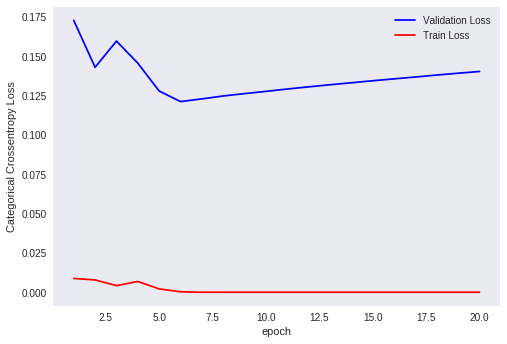

In [0]:
 from keras.models import Sequential 
from keras.layers import Dense, Activation 
  
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization


model_drop = Sequential()

model_drop.add(Dense(400, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=he_normal( seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='sigmoid', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))




model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))




vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Accuracy of Case 1 after using batch normalization and drop out techniques : 98.62**

#Case 2: **Taking** 3 Hidden layers with size 512,100 and 50

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.2591 - acc: 0.9243 - val_loss: 0.1146 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0900 - acc: 0.9730 - val_loss: 0.0907 - val_acc: 0.9704
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0609 - acc: 0.9809 - val_loss: 0.0692 - val_acc: 0.9794
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0388 - acc: 0.9878 - val_loss: 0.0765 - val_acc: 0.9780
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 0.0631 - val_acc: 0.9811
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0236 - acc: 0.9925 - val_loss: 0.0987 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0211 - acc: 0.9931 - val_loss: 0.0801 - 

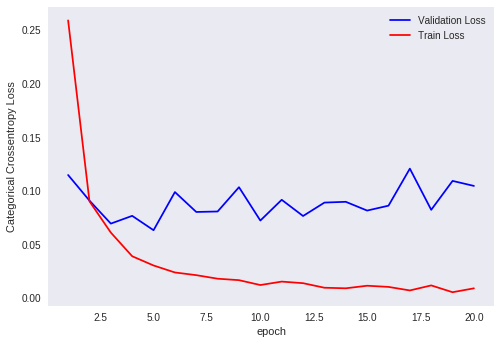

In [0]:
 from keras.models import Sequential 
from keras.layers import Dense, Activation 
  
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(100, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))




vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Accuracy of case 2 with 3 hidden layers : 97.86**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 100)               51300     
_________________________________________________________________
batch_normalization_17 (Batc (None, 100)               400       
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 50)                5050      
__________

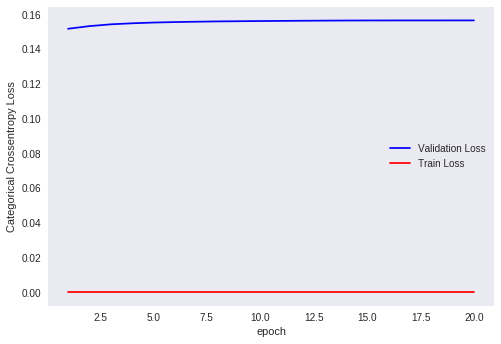

In [0]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=he_normal( seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(50, activation='sigmoid', kernel_initializer=he_normal( seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()


model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))




vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Accuracy of Case 2 after using batch normalization and drop out techniques : 98.61**

# Case 3 : Taking 4 Hidden layers with sizes 600,400,200 and 75 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.2176 - acc: 0.9352 - val_loss: 0.0986 - val_acc: 0.9684
Epoch 2/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0852 - acc: 0.9734 - val_loss: 0.0875 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0558 - acc: 0.9820 - val_loss: 0.0784 - val_acc: 0.9759
Epoch 4/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0420 - acc: 0.9867 - val_loss: 0.0924 - val_acc: 0.9728
Epoch 5/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0291 - acc: 0.9901 - val_loss: 0.0701 - val_acc: 0.9802
Epoch 6/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0302 - acc: 0.9903 - val_loss: 0.0931 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0249 - acc: 0.9921 - val_loss: 0.

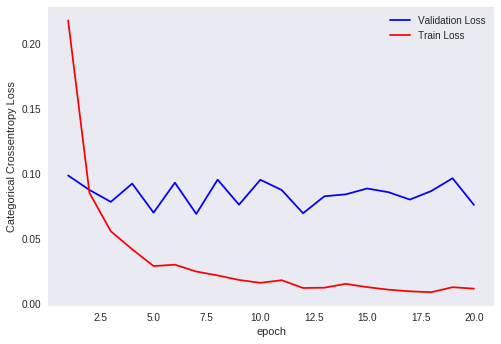

In [0]:
 from keras.models import Sequential 
from keras.layers import Dense, Activation 
  
model_relu = Sequential()
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(400, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(200, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(75, activation='relu', kernel_initializer=he_normal(seed=None)) )


model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))




vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Accuracy of Case 3 : 98.38**

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9861
Epoch 2/20
60000/60000 [==============================] - 12s 202us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9861
Epoch 3/20
60000/60000 [==============================] - 12s 205us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9861
Epoch 4/20
60000/60000 [==============================] - 12s 208us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9861
Epoch 5/20
60000/60000 [==============================] - 12s 205us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9861
Epoch 6/20
60000/60000 [==============================] - 12s 202us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9861
Epoch 7/20
60000/60000 [==============================] - 12s 204us/step - loss: 1.1921e-07 

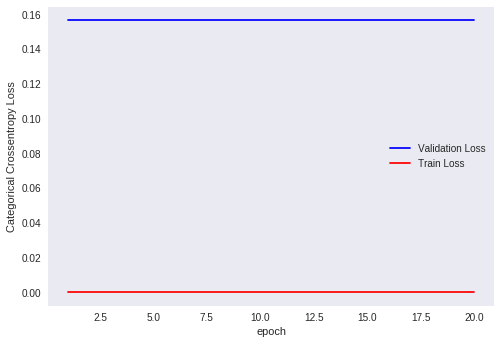

In [0]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=he_normal( seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(400, activation='sigmoid', kernel_initializer=he_normal( seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='sigmoid', kernel_initializer=he_normal( seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(75, activation='sigmoid', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))





model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))




vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Accuracy of Case 3 after using batch normalization and drop out techniques : 98.61**

# Comments:



1. Increasing number of hidden layers doesn't guarantee us better accuracy
2. Drop out and Batch Normalization techniques are increasing the accuracy
3. Choosing the size of hidden layers is also an important factor